In [1]:
# Bibliotecas Utilizadas:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import transforms
from matplotlib.collections import PolyCollection
import numpy as np

In [2]:
class plotagem:
    
    def __init__(self, n, padrao_usuario = False):
        
        # =============================== #
        
        self.padrao_usuario = { 
            # tudo o que pode ser alterado
            
            #_____________________#
            # imagem | alterações referentes a imagem como um todo
            
            'eixoy':True, # compartilhamento do eixo y para todos os graficos
            'comprimento':6, # comprimento da imagem
            'altura':5, # altura da imagem
            'resolucao':70, # resolução da imagem (valor em dpi ou pixel por polegada)
            'titulo_geral':'', # título do topo da imagem
            'titulo_geral_fonte':16, # fonte do título do topo da imagem
            'fundo_cor':'w', # cor de fundo da imagem
            'fundo_transparencia':0.5, #transparência do fundo da imagem
            'plot_fundo_cor':'w', # cor de fundo do plot
            'plot_fundo_transparencia':1.0, # transparência do fundo do plot
            'padrao_escuro':False, # NÃO HABILITADO (padrão escuro de imagens)
            #_____________________#
            # curvas | alterações referentes aos tracks (curvas ou perfis)
            
            'linha_estilo' : '-', # estilo da curva do track
            'linha_espessura':1, # espessura da curva do track
            'linha_nome':' ', # nome do track (descrição da curva)
            'titulo' : '', # título do track (topo da imagem)
            'titulo_fonte':13, # tamanho de fonte do título do track
            'cor':'grey', # cor da linha do track (pdrão cinza)
            'cor_lista':False, # cor das linhas do track para plots múltiplos
            'descricao_x':'-', # descrição do eixo x do track
            'descricao_y':'-', # descrição do eixo y do track
            'descricao_fonte':13, # fonte das descrições dos tracks
            'legenda_simples':False, # 1
            'curva_limite':False, # 2
            'minimo_x':False, # valor mínimo para a curva do eixo x
            'maximo_x':False, # valor máximo para a curva do eixo x
            'minimo_y':False, # valor mínimo para a curva do eixo y
            'maximo_y':False, # valor máximo para a curva do eixo y
            'maximos_x':False, # 3 NÃO HABILITADO
            'maximos_y':False  # 3 NÃO HABILITADO
        }
        
        # 1 As legendas podem ser colocadas tanto no próprio track quanto separadas na função legenda
        # Se o valor for True (verdadeiro) as legendas serão postas no próprio track
        # Se o valor for False (falso PADRÃO) é preciso usar a função legenda
        
        # 2 No gráfico tipo plot_l (plot litologia) é possível usar uma curva limitante
        # esta curva ajuda a ver a propriedade variando juntamente com a litologia
        # apesar de ser chamado de plot_l, serve para qualquer tipo de dado classificatório
        # como por exemplo fluídos, fácies, mineralogia, etc.
        
        # 3 Preparados para um tipo de plot com sobreposição de 2 ou mais curvas com unidades distintas
        
        if padrao_usuario:
            
            for i in padrao_usuario:
                
                self.padrao_usuario[i] = padrao_usuario[i]
        
        # =============================== #
        
        self.ax = [0]*n # número de tracks
        self.lab = []   # número de elementos de legenda
        
        self.fig, (self.ax) = plt.subplots(1,n,sharey=self.padrao_usuario['eixoy'],figsize=(
            self.padrao_usuario['comprimento'],
            self.padrao_usuario['altura']),
            dpi=self.padrao_usuario['resolucao'])
        
        self.fig.suptitle(self.padrao_usuario['titulo_geral'], fontsize=self.padrao_usuario['titulo_geral_fonte'])
        
        self.fig.patch.set_facecolor(self.padrao_usuario['fundo_cor'])
        self.fig.patch.set_alpha(self.padrao_usuario['fundo_transparencia'])
        
        self.cor_plot_fundo = self.padrao_usuario['plot_fundo_cor']
        self.transparencia_plot_fundo = self.padrao_usuario['plot_fundo_transparencia']
        
    # ------------------------------------------------------------------------- #
    # definindo definicoes de usuarios locais
    
    def padrao_local(self,padrao_entrada,padrao_base = False):
        
        if padrao_base:
            padrao_base = padrao_base.copy()
        else:
            padrao_base = self.padrao_usuario.copy()
        
        if padrao_entrada:
        
            padrao_local = padrao_base.copy()

            for i in padrao_entrada:

                padrao_local[i] = padrao_entrada[i]
        
        else:
            
            padrao_local = padrao_base.copy()
            
        return padrao_local
        
    # ------------------------------------------------------------------------- #
    
    def max_min_locais(self,X,Y,padrao_entrada):
        
        if padrao_entrada['maximo_x']:
            maxx = padrao_entrada['maximo_x'];
        else:
            maxx = np.nanmax(X)
            
        # =============================== #
            
        if padrao_entrada['minimo_x']:
            minx = padrao_entrada['minimo_x'];
        else:
            minx = np.nanmin(X)
            
        # =============================== #
        
        if padrao_entrada['maximo_y']:
            maxy = padrao_entrada['maximo_y'];
        else:
            maxy = np.nanmax(Y)
            
        # =============================== #
            
        if padrao_entrada['minimo_y']:
            miny = padrao_entrada['minimo_y'];
        else:
            miny = np.nanmin(Y)
            
        # =============================== #
        
        return [minx,maxx,miny,maxy]
        
            
    # ------------------------------------------------------------------------- #
    
    def plot_s(self,
               indice,
               X,
               Y,
               padrao_local = False
            ):

            
        padrao = self.padrao_local(padrao_local).copy()
        
        """plot simples"""
        
        min_max_values = self.max_min_locais(X,Y,padrao)
        minx = min_max_values[0]
        maxx = min_max_values[1]
        miny = min_max_values[2]
        maxy = min_max_values[3]
        
        lab_s = self.ax[indice].plot(X,Y,c = padrao['cor'],
                                     ls = padrao['linha_estilo'],
                                     label = padrao['linha_nome'],
                                     linewidth = padrao['linha_espessura'])
        
        self.ax[indice].grid()
        self.ax[indice].set_ylim(maxy,miny)
        self.ax[indice].set_xlim(minx,maxx)
        self.ax[indice].set_title(padrao['titulo'], fontsize=padrao['titulo_fonte'])
        if indice == 0:
            self.ax[indice].set_ylabel(padrao['descricao_y'], fontsize=padrao['descricao_fonte'])
        self.ax[indice].set_xlabel(padrao['descricao_x'], fontsize=padrao['descricao_fonte'])
        
        self.ax[indice].patch.set_facecolor(self.padrao_usuario['plot_fundo_cor'])
        self.ax[indice].patch.set_alpha(self.padrao_usuario['plot_fundo_transparencia'])
        
        if padrao['legenda_simples']:
            self.ax[indice].legend(loc = padrao['legenda_simples'])
        
        self.lab = self.lab + lab_s
        
    # ------------------------------------------------------------------------- #
        
    def plot_m(self,
               indice,
               XX,
               Y,
               padrao_local = False
        ):
        
        padrao = self.padrao_local(padrao_local).copy()
        
        """plot multiplo"""
        
        min_max_values = self.max_min_locais(Y,Y,padrao)
        miny = min_max_values[2]
        maxy = min_max_values[3]
        
        if padrao['cor_lista']:
            crs = padrao['cor_lista'].copy()
        else:
            crs = ['b']*len(XX)
            
        self.ax[indice].grid()
        self.ax[indice].set_ylim(maxy,miny)

        self.ax[indice].set_title(padrao['titulo'], fontsize=padrao['titulo_fonte'])
        
        for i in range(len(XX)):
            lab_m = self.ax[indice].plot(XX[i],Y,c = crs[i],
                                     ls = padrao['linha_estilo'],
                                     label = padrao['linha_nome'],
                                     linewidth = padrao['linha_espessura'])
            
            self.lab = self.lab + lab_m
        
        if indice == 0:
            self.ax[indice].set_ylabel(padrao['descricao_y'], fontsize=padrao['descricao_fonte'])
        self.ax[indice].set_xlabel(padrao['descricao_x'], fontsize=padrao['descricao_fonte'])
        
        self.ax[indice].patch.set_facecolor(self.padrao_usuario['plot_fundo_cor'])
        self.ax[indice].patch.set_alpha(self.padrao_usuario['plot_fundo_transparencia'])
        
        if padrao['legenda_simples']:
            self.ax[indice].legend(loc = padrao['legenda_simples'])
        
    # ------------------------------------------------------------------------- #
        
    def plog_s(self,indice,X,Y,
               padrao_local = False
            ):
        
        padrao = self.padrao_local(padrao_local).copy()
        
        """plot simples log"""
        
        min_max_values = self.max_min_locais(X,Y,padrao)
        minx = min_max_values[0]
        maxx = min_max_values[1]
        miny = min_max_values[2]
        maxy = min_max_values[3]
        
        lab_log_s = self.ax[indice].semilogx(X,Y,c = padrao['cor'],
                                     ls = padrao['linha_estilo'],
                                     label = padrao['linha_nome'],
                                     linewidth = padrao['linha_espessura'])
        
        self.ax[indice].grid()
        self.ax[indice].set_ylim(maxy,miny)
        self.ax[indice].set_xlim(minx,maxx)
        self.ax[indice].set_title(padrao['titulo'], fontsize=padrao['titulo_fonte'])

        if indice == 0:
            self.ax[indice].set_ylabel(padrao['descricao_y'], fontsize=padrao['descricao_fonte'])
        self.ax[indice].set_xlabel(padrao['descricao_x'], fontsize=padrao['descricao_fonte'])
        
        self.ax[indice].patch.set_facecolor(self.padrao_usuario['plot_fundo_cor'])
        self.ax[indice].patch.set_alpha(self.padrao_usuario['plot_fundo_transparencia'])
        
        if padrao['legenda_simples']:
            self.ax[indice].legend(loc = padrao['legenda_simples'])
        
        self.lab = self.lab + lab_log_s
        
    # ------------------------------------------------------------------------- #
        
    def plot_l(self,
               indice,
               litologia,
               Y,
               relacao_cor,
               padrao_local = False
              ):
        
        padrao = self.padrao_local(padrao_local).copy()
        
        """plot litologia"""
        
        variavel_booleana = False
        
        try:
            variavel_booleana = bool(padrao['curva_limite'])
        except:
            variavel_booleana = bool(padrao['curva_limite'].any())

        if variavel_booleana:
            
            curva_limite = padrao['curva_limite'].copy()
            min_max_values = self.max_min_locais(curva_limite,Y,padrao)
            minx = min_max_values[0]
            maxx = min_max_values[1]
            miny = min_max_values[2]
            maxy = min_max_values[3]
        
        else:
            
            curva_limite = [100.0]*len(Y)
            min_max_values = self.max_min_locais(curva_limite,Y,padrao)
            minx = 0.0
            maxx = 90.0
            miny = min_max_values[2]
            maxy = min_max_values[3]

        codigos = []
        for i in relacao_cor:
            codigos.append(i)
            
        # =============================== #
        
        num_cores = len(codigos)
        
        curva_de_base = [minx]*len(curva_limite)
        
        matriz_litologias = np.array([curva_de_base]*num_cores)
        
        for j in range(num_cores):
            for i in range(len(matriz_litologias[j])):
                if litologia[i] == codigos[j] and  ~np.isnan(curva_limite[i]):
                    matriz_litologias[j][i] = curva_limite[i]
                    
        # =============================== #
        
        for i in relacao_cor:
            self.lab = self.lab + [mpatches.Patch(label=relacao_cor[i][1],color=relacao_cor[i][0])]
        
        # =============================== #
        
        if padrao['linha_espessura'] == self.padrao_usuario['linha_espessura']:
            padrao['linha_espessura'] = 0.00
        
        for i in range(num_cores):
            self.ax[indice].plot(matriz_litologias[i],Y,c = relacao_cor[codigos[i]][0],linewidth = padrao['linha_espessura'])
            self.ax[indice].fill_betweenx(Y,curva_de_base, matriz_litologias[i], facecolor=relacao_cor[codigos[i]][0],
                                          label=relacao_cor[codigos[i]][1])
            
        self.ax[indice].set_ylim(maxy,miny)
        self.ax[indice].set_xlim(minx,maxx)
        if indice == 0:
            self.ax[indice].set_ylabel(padrao['descricao_y'], fontsize=padrao['descricao_fonte'])
        self.ax[indice].set_xlabel(padrao['descricao_x'], fontsize=padrao['descricao_fonte'])
        self.ax[indice].set_title(padrao['titulo'], fontsize=padrao['titulo_fonte'])
        self.ax[indice].set_xticks([])
        
        self.ax[indice].patch.set_facecolor(self.padrao_usuario['plot_fundo_cor'])
        self.ax[indice].patch.set_alpha(self.padrao_usuario['plot_fundo_transparencia'])
            
    # ------------------------------------------------------------------------- #
    
    def plot_l2(self,
           indice,
           litologia,
           Y,
           relacao_cor,
           padrao_local = False
          ):
        
        # =============================== #
        
        cores = {}
        ul = []
        for i in relacao_cor:
            cores[i] = relacao_cor[i][0]
            self.lab = self.lab + [mpatches.Patch(label=relacao_cor[i][1],color=relacao_cor[i][0])]
            ul.append(i)
            
        # =============================== #
        
        padrao = self.padrao_local(padrao_local).copy()
        
        """plot litologia em matriz"""
        
        min_max_values = self.max_min_locais(Y,Y,padrao) # !!! esta redundante !!!
        miny = min_max_values[2]
        maxy = min_max_values[3]    
        
        # =============================== #
        ul = np.array(ul) #np.unique(litologia)
        transformacao = transforms.blended_transform_factory(self.ax[indice].transAxes,self.ax[indice].transData)
        for l in ul:
            #print(l)
            onde = litologia == l
            #print(onde)
            dz= (Y[1]-Y[0])/2
            obj = self.ax[indice].fill_betweenx(Y-dz, 0, 1,where = onde , color = cores[l],transform = transformacao)
            obj = self.ax[indice].fill_betweenx(Y+dz, 0, 1,where = onde , color = cores[l],transform = transformacao)
            
        # =============================== #
            
        self.ax[indice].set_ylim(maxy,miny)
        if indice == 0:
            self.ax[indice].set_ylabel(padrao['descricao_y'], fontsize=padrao['descricao_fonte'])
        self.ax[indice].set_xlabel(padrao['descricao_x'], fontsize=padrao['descricao_fonte'])
        self.ax[indice].set_title(padrao['titulo'], fontsize=padrao['titulo_fonte'])
        self.ax[indice].set_xticks([])
        
        self.ax[indice].patch.set_facecolor(self.padrao_usuario['plot_fundo_cor'])
        self.ax[indice].patch.set_alpha(self.padrao_usuario['plot_fundo_transparencia'])
    
    # ------------------------------------------------------------------------- #
    
    def legenda(self,
                padrao_local = False
               ):
        
        self.padrao_legenda = {
            
            'ancoragem':(0., 1.10, 2.32, .102),
            'ordem':False,
            'fonte':13,
            'transparencia':0.9,
            'colunas':4,
            'modo':'expand',
            'borda':0.0,
            'indice':0
        }
        
        padrao = self.padrao_local(padrao_local,self.padrao_legenda).copy()
        
        if padrao['ordem']:
            novo_lab = []
            for i in padrao['ordem']:
                novo_lab.append(self.lab[i])
        else:
            novo_lab = self.lab
        
        self.ax[padrao['indice']].legend(handles=novo_lab, bbox_to_anchor=padrao['ancoragem'],
                               loc=0,
                               ncol=padrao['colunas'],
                               mode=padrao['modo'],
                               borderaxespad=padrao['borda'],
                               fontsize=padrao['fonte']).get_frame().set_alpha(padrao['transparencia'])
    
    # ------------------------------------------------------------------------- #
    
    def mostrar(self):
        plt.show()
        
    # ------------------------------------------------------------------------- #
        
    def salvar(self,caminho,transparencia = True,resolucao = 72):
        self.fig.savefig(caminho, transparent=transparencia, dpi = resolucao, bbox_inches="tight")

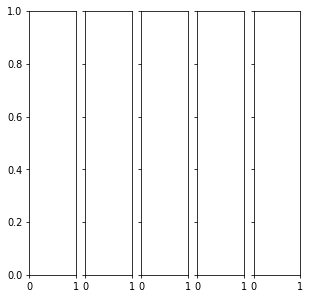

In [3]:
# criando uma iamgem, definindo as dimensões e números de tracks
padrao_1 = {
            'comprimento':5, # comprimento da imagem 
            'altura':5 # altura da imagem
}

numero_plotes = 5 # número de tracks que vai ter

figura = plotagem(
    numero_plotes, # número de plots (5 definido na variável)
    padrao_1 # padrão 1 definido na variável "padrao_1"
)

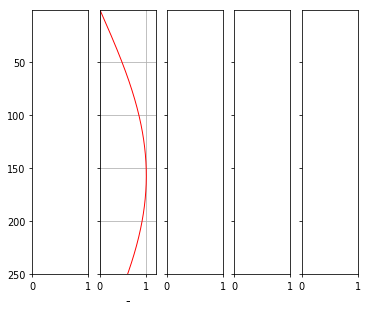

In [4]:
# incorporando uma curva e aplicando novos limites
n = 250 # curva com 1000 elementos

# simulando um track de dao sísmico em profundidade
y = np.linspace(1,n,n) # linspace para criar o dado de profundidade
x0 = np.sin(y/100) # Função seno simulando um sinal sísmico

# plot (sem padrão de altura x largura)

figura = plotagem(numero_plotes) # visto acima

figura.plot_s( # plot simples, uma curva
    1, # plotar no track 1 (python começa do zero)
    x0, # a curva x0
    y, # com a profundidade y
    {'cor':'r', # com cor vermelha
     'minimo_x':-0.001, # com valor mínimo de -0.001 OBS: não aceita zero
     'maximo_x':1.2} # com valor máximo de 1.2
)

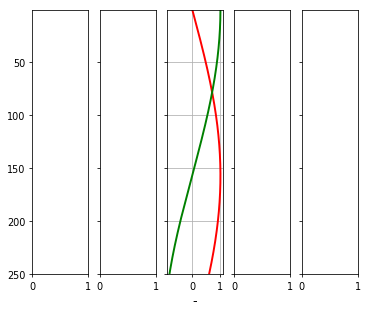

In [5]:
x1 = np.cos(y/100) # nova função cosseno simulando outro dado

# plot:

figura = plotagem(numero_plotes)
figura.plot_m(
    2, # track 2
    [x0,x1], # curvas x0 e x1
    y, # valor y como profunidade
    {'cor_lista':['r','g'], # lista de cores (mesma ordem das curvas)
     'linha_espessura':2} # espessura das linhas = 2
)
# OBS: linhas nomes não está finalizado, label incompleto aqui

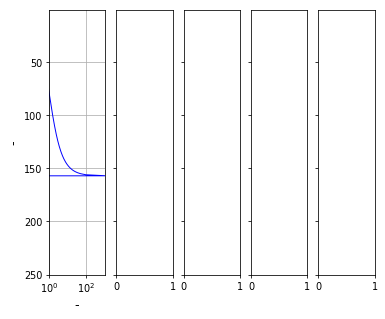

In [6]:
x2 = np.tan(y/100)

figura = plotagem(numero_plotes)
figura.plog_s(0,x2,y,{'minimo_x':1,'maximo_x':1000,'cor':'b'})

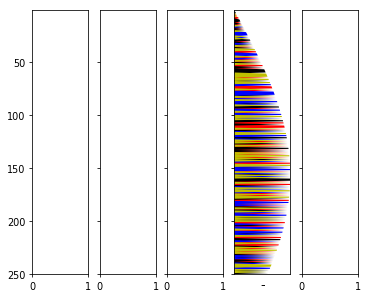

In [7]:
# plot litologia (classes)

x3 = list(np.random.randint(1,5,n)) # criando uma classe cujos valores variam de 1 a 5

x3_info = { # informação das classes
    1.0:['r','um'], # 1.0 tem a cor 'r' de red e nome 'um'
    2:['k','dois'], # similar ao primeiro
    3:['b','três'], # similar ao primeiro
    4:['y','quatro'] # similar ao primeiro
}

# adicionando valores não numéricos para testar as curvas

x3[1] = np.nan
x3[0] = np.nan
x3[-1] = np.nan

figura = plotagem(numero_plotes)

# plot

figura.plot_l(
    3, # track 3
    x3, # curva x3
    y, # curva de profunidade
    x3_info, # informativo da curva x3
    {'curva_limite':x0}) # utilizando a curva limite x0 para diferenciar a borda

# para testar sem a curva limite, utilizar esse aqui:

#figura.plot_l(3,x3,y,x3_info)

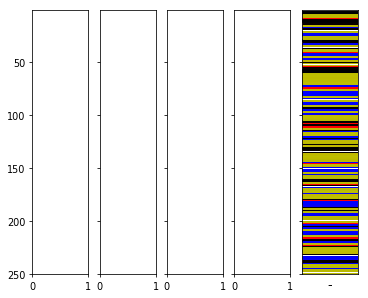

In [8]:
# plot como alternativa ao plot_l para profundidades restritas (muito detalhe)
# Implementaçõo Vizeu (adapatado)

figura = plotagem(numero_plotes)

figura.plot_l2(4, # track de número 4
               x3, # curva x3
               y, # curva profundidade
               x3_info # informativo de x3
              )

figura.mostrar()

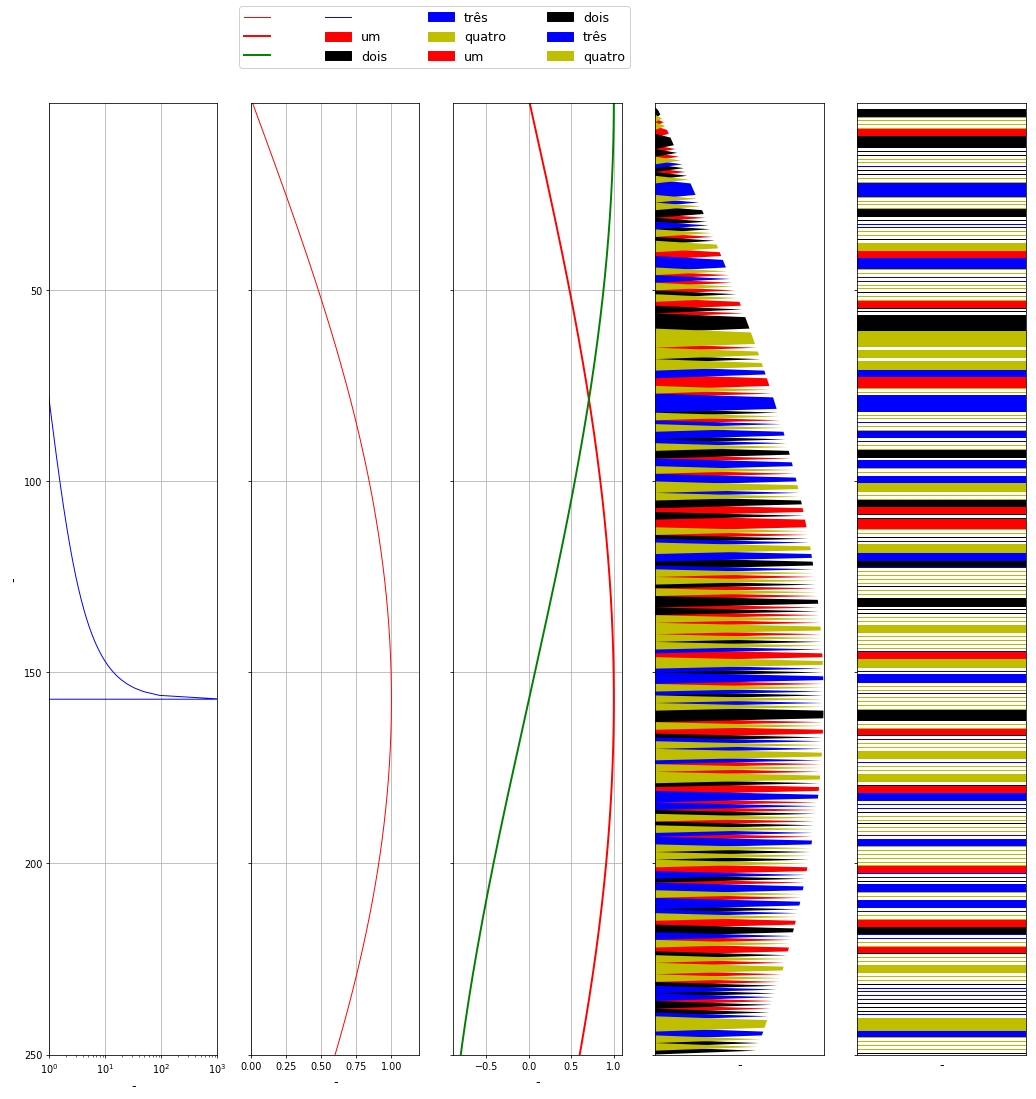

In [9]:
# plot completo

padrao_2 = {
            'comprimento':18,
            'altura':18
}

figura = plotagem(numero_plotes,padrao_2)
figura.plot_s(1,x0,y,{'cor':'r','minimo_x':-0.001,'maximo_x':1.2})
figura.plot_m(2,[x0,x1],y,{'cor_lista':['r','g'],'linha_espessura':2})
figura.plog_s(0,x2,y,{'minimo_x':1,'maximo_x':1000,'cor':'b'})
figura.plot_l(3,x3,y,x3_info,{'curva_limite':x0})
figura.plot_l2(4,x3,y,x3_info)
figura.legenda({
    'ancoragem':(1.13, 1.0, 2.32, .102) # define a posição da legenda
})
